<a href="https://colab.research.google.com/github/ak55m/customer-segmentation-kmeans-pca/blob/main/kmeans_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

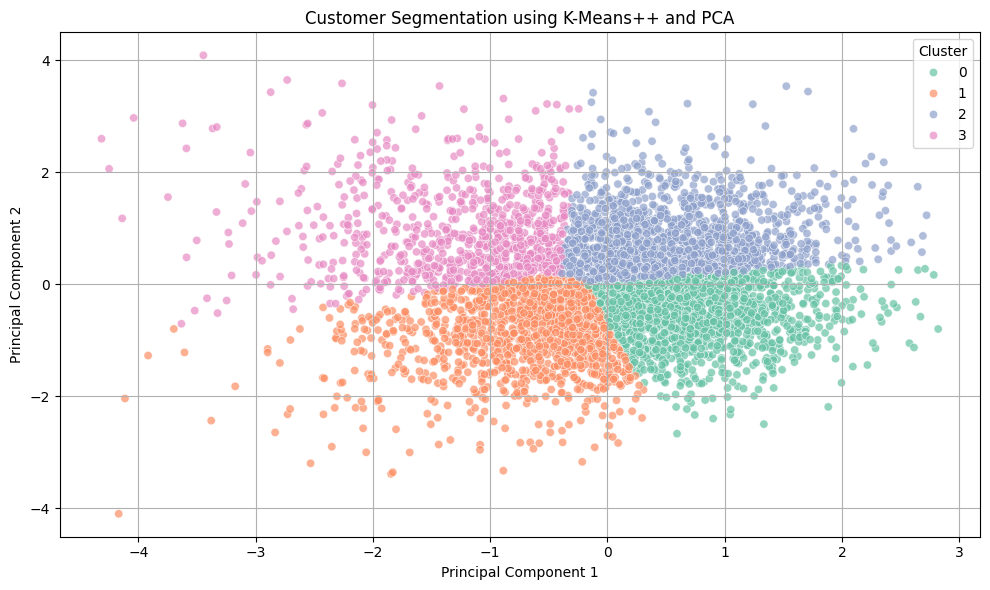

Silhouette Score: 0.3087950416274017


In [2]:
# Safe version of the customer segmentation code, ready to run in this environment

import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate synthetic customer dataset
np.random.seed(42)
n_customers = 5000
data = {
    "Recency": np.random.exponential(scale=30, size=n_customers),
    "Frequency": np.random.poisson(lam=10, size=n_customers),
    "Monetary": np.random.gamma(shape=2, scale=100, size=n_customers),
    "Tenure": np.random.normal(loc=365, scale=100, size=n_customers).clip(min=0)
}
df = pd.DataFrame(data)

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Step 4: K-Means++ clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(pca_data)

# Add PCA and cluster labels to DataFrame
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]
df['Cluster'] = labels

# Step 5: Silhouette score using a sample
sampled_data, sampled_labels = resample(pca_data, labels, n_samples=1000, random_state=42)
silhouette = silhouette_score(sampled_data, sampled_labels)

# Step 6: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df, legend='full', alpha=0.7)
plt.title('Customer Segmentation using K-Means++ and PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Cluster analysis
cluster_summary = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary', 'Tenure']].mean()
cluster_summary.reset_index(inplace=True)

# Show the cluster summary
cluster_summary

# Show the silhouette score
print("Silhouette Score:", silhouette)



In [3]:
# Step 7: Cluster analysis
cluster_summary = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary', 'Tenure']].mean()
cluster_summary.reset_index(inplace=True)

# Display the summary table
cluster_summary


,Cluster,Recency,Frequency,Monetary,Tenure
0,0,14.534057,9.133508,169.694936,435.484087
1,1,25.558544,7.658279,324.742457,333.337546
2,2,25.854863,12.735356,125.616643,360.669741
3,3,70.633310,10.510328,204.941142,283.946135


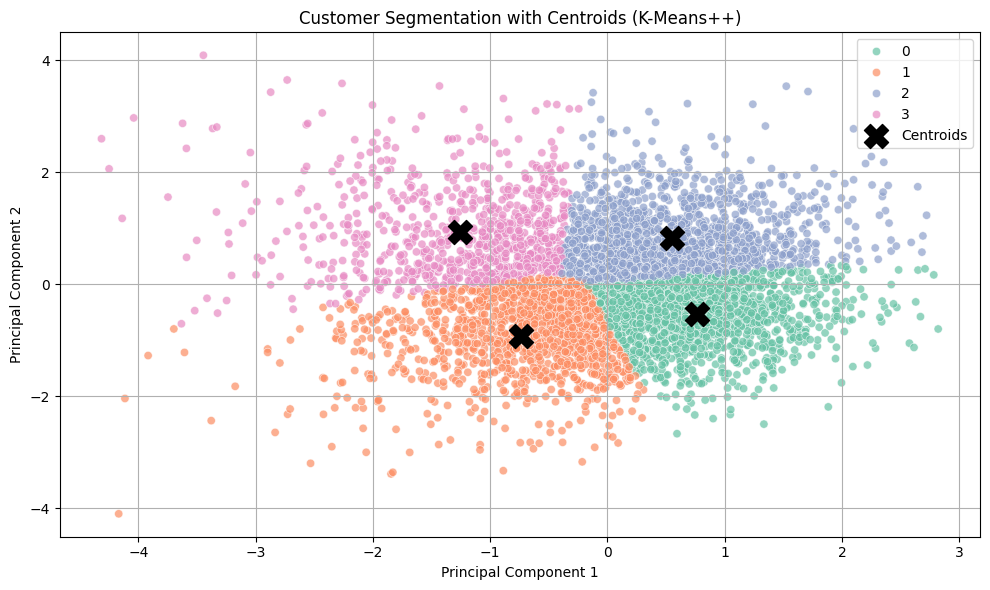

In [4]:
# Step 6: Visualization with Centroids
plt.figure(figsize=(10, 6))

# Plot customers by cluster
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df, alpha=0.7)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, c='black', marker='X', label='Centroids'
)

# Labels and formatting
plt.title('Customer Segmentation with Centroids (K-Means++)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
